In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import shutil
import pandas as pd

In [4]:
class_identity = pd.read_csv('/content/drive/MyDrive/Dataset-20230713T111337Z-001/Dataset/class_identity.csv')
list_attribute = pd.read_csv('/content/drive/MyDrive/Dataset-20230713T111337Z-001/Dataset/list_attribute.csv')

In [5]:
class_identity

,Filename,Id
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


In [6]:
list_attribute

,id,202599_5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [7]:
male = list_attribute['Male']
class_identity = class_identity.join(male)

In [8]:
class_identity = class_identity.sample(n=2500, random_state = 42).reset_index(drop=True)

In [9]:
class_identity.drop(['Id'], axis=1, inplace=True)

In [10]:
class_identity

,Filename,Male
0,093242.jpg,1
1,121414.jpg,-1
2,010625.jpg,1
3,082524.jpg,-1
4,073193.jpg,-1
...,...,...
2495,167758.jpg,-1
2496,069618.jpg,1
2497,139740.jpg,-1
2498,130472.jpg,-1


In [11]:
class_identity.loc[class_identity['Male'] == 1, 'Male'] = "Male"
class_identity.loc[class_identity['Male'] == -1, 'Male'] = "Female"

In [12]:
class_identity

,Filename,Male
0,093242.jpg,Male
1,121414.jpg,Female
2,010625.jpg,Male
3,082524.jpg,Female
4,073193.jpg,Female
...,...,...
2495,167758.jpg,Female
2496,069618.jpg,Male
2497,139740.jpg,Female
2498,130472.jpg,Female


In [13]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(class_identity, test_size=0.2)
test_df, validation_df = train_test_split(test_df, test_size=0.33)

In [14]:
len(train_df)

2000

In [15]:
len(test_df)

335

In [16]:
len(validation_df)

165

In [17]:
IMAGE_SIZE = (218, 178)
BATCH_SIZE = 16

In [18]:
import zipfile

!unzip /content/drive/MyDrive/Dataset-20230713T111337Z-001/Dataset/img_align_celeba.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
 extracting: img_align_celeba/197600.jpg  
 extracting: img_align_celeba/197601.jpg  
 extracting: img_align_celeba/197602.jpg  
 extracting: img_align_celeba/197603.jpg  
 extracting: img_align_celeba/197604.jpg  
 extracting: img_align_celeba/197605.jpg  
 extracting: img_align_celeba/197606.jpg  
 extracting: img_align_celeba/197607.jpg  
 extracting: img_align_celeba/197608.jpg  
 extracting: img_align_celeba/197609.jpg  
 extracting: img_align_celeba/197610.jpg  
 extracting: img_align_celeba/197611.jpg  
 extracting: img_align_celeba/197612.jpg  
 extracting: img_align_celeba/197613.jpg  
 extracting: img_align_celeba/197614.jpg  
 extracting: img_align_celeba/197615.jpg  
 extracting: img_align_celeba/197616.jpg  
 extracting: img_align_celeba/197617.jpg  
 extracting: img_align_celeba/197618.jpg  
 extracting: img_align_celeba/197619.jpg  
 extracting: img_align_celeba/197620.jpg  
 extracting: img_align_celeba/197621.j

In [19]:
IMG_PATH = '/content/img_align_celeba'

In [20]:
train_df

,Filename,Male
398,151897.jpg,Female
1598,154517.jpg,Male
973,043367.jpg,Female
1418,091202.jpg,Male
2060,018772.jpg,Female
...,...,...
170,165181.jpg,Male
768,178793.jpg,Female
1102,002864.jpg,Female
1530,103736.jpg,Female


In [21]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    IMG_PATH + "/",
    x_col='Filename',
    y_col='Male',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 2000 validated image filenames belonging to 2 classes.


In [22]:
class_identity.head(-10)

,Filename,Male
0,093242.jpg,Male
1,121414.jpg,Female
2,010625.jpg,Male
3,082524.jpg,Female
4,073193.jpg,Female
...,...,...
2485,181963.jpg,Female
2486,156956.jpg,Female
2487,092708.jpg,Male
2488,039176.jpg,Female


In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    IMG_PATH + "/",
    x_col='Filename',
    y_col='Male',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 165 validated image filenames belonging to 2 classes.


In [24]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    IMG_PATH + "/",
    x_col='Filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 335 validated image filenames.


In [25]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='weights.best.inc.male.hdf5',
                               verbose=1, save_best_only=True)

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=4,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0001)
callbacks = [earlystop, learning_rate_reduction, checkpointer]

In [27]:
#GoogleNet Model
base_model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False, weights='imagenet',
    input_shape=(218, 178, 3), pooling='avg'
    #classifier_activation='softmax'
)
for layer in base_model.layers:
  layer.trainable = False

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

87910968/87910968 [==============================] - 1s 0us/step


In [28]:
optimizer = tf.optimizers.Adam(lr=0.001)

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [30]:
print(len(train_df))

2000


In [31]:
print(len(validation_df))

165


In [32]:
print(len(validation_df)//BATCH_SIZE)

10


In [33]:
print(len(train_df)//BATCH_SIZE)

125


In [34]:
history = model.fit(train_generator, validation_data = validation_generator
                        , validation_steps=len(validation_df)//BATCH_SIZE
                        ,steps_per_epoch=len(train_df)//BATCH_SIZE,
                        epochs=10, verbose = 1, callbacks=callbacks
                    )

Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 0.4184 - accuracy: 0.8675
Epoch 1: val_loss improved from inf to 0.28197, saving model to weights.best.inc.male.hdf5
125/125 [==============================] - 137s 1s/step - loss: 0.4184 - accuracy: 0.8675 - val_loss: 0.2820 - val_accuracy: 0.8813 - lr: 0.0010
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 0.2732 - accuracy: 0.8855
Epoch 2: val_loss improved from 0.28197 to 0.24491, saving model to weights.best.inc.male.hdf5
125/125 [==============================] - 132s 1s/step - loss: 0.2732 - accuracy: 0.8855 - val_loss: 0.2449 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 0.2335 - accuracy: 0.9110
Epoch 3: val_loss improved from 0.24491 to 0.22283, saving model to weights.best.inc.male.hdf5
125/125 [==============================] - 134s 1s/step - loss: 0.2335 - accuracy: 0.9110 - val_loss: 0.2228 - val_accuracy: 0.9250 - lr: 0.0

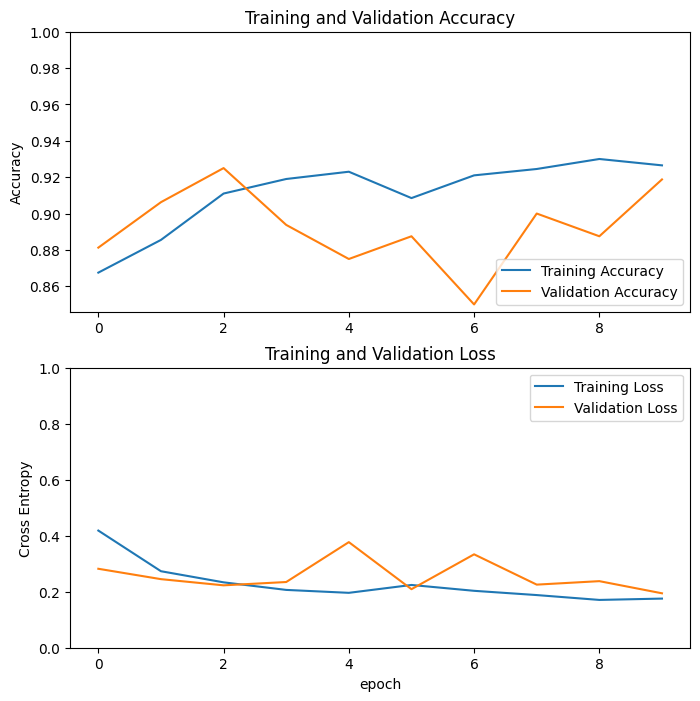

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [36]:
model.load_weights('weights.best.inc.male.hdf5')

In [37]:
predict = model.predict(test_generator, steps=np.ceil(len(test_df)/BATCH_SIZE))

21/21 [==============================] - 20s 884ms/step


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
prediction = predict.argmax(axis=-1)
test_df['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]

In [40]:
test_df

,Filename,Male,Prediction
2081,160140.jpg,Female,Female
407,116187.jpg,Female,Female
632,182510.jpg,Female,Female
380,025749.jpg,Female,Female
49,046067.jpg,Female,Female
...,...,...,...
870,047318.jpg,Female,Female
140,103310.jpg,Male,Male
111,055096.jpg,Male,Female
628,156099.jpg,Male,Male


In [41]:
labels = ['Male','Female']

cm = confusion_matrix(test_df['Male'], test_df["Prediction"], labels= labels)
cm

array([[130,   8],
       [ 20, 177]])

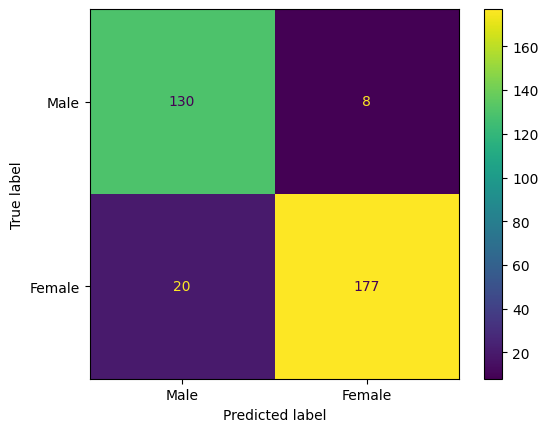

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(test_df['Male'], test_df["Prediction"], labels= labels))

              precision    recall  f1-score   support

        Male       0.87      0.94      0.90       138
      Female       0.96      0.90      0.93       197

    accuracy                           0.92       335
   macro avg       0.91      0.92      0.91       335
weighted avg       0.92      0.92      0.92       335

